___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Matplotlib Exercises 
Welcome to the exercises for reviewing matplotlib! Take your time with these, Matplotlib can be tricky to understand at first. These are relatively simple plots, but they can be hard if this is your first time with matplotlib, feel free to reference the solutions as you go along.

Also don't worry if you find the matplotlib syntax frustrating, we actually won't be using it that often throughout the course, we will switch to using seaborn and pandas built-in visualization capabilities. But, those are built-off of matplotlib, which is why it is still important to get exposure to it!

**NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.**

# Exercises

**We will focus on two commons tasks, plotting a known relationship from an equation and plotting raw data points.**

Follow the instructions to complete the tasks to recreate the plots using this data:

----
----

### Task One: Creating data from an equation

It is important to be able to directly translate a real equation into a plot. Your first task actually is pure numpy, then we will explore how to plot it out with Matplotlib. The [world famous equation](https://en.wikipedia.org/wiki/Mass%E2%80%93energy_equivalence) from Einstein:

$$E=mc^2$$


Use your knowledge of Numpy to create two arrays: E and m , where **m** is simply 11 evenly spaced values representing 0 grams to 10 grams. E should be the equivalent energy for the mass. You will need to figure out what to provide for **c** for the units m/s, a quick google search will easily give you the answer (we'll use the close approximation in our solutions).

**NOTE: If this confuses you, then hop over to the solutions video for a guided walkthrough.**

In [1]:
import numpy as np

In [14]:
m = np.linspace(0, 10, 11)

In [15]:
m

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

The array m should look like this: 

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [4]:
c = 3 * 10**8

In [27]:
pd.set_option('display.float_format', '{:.2g}'.format)

<IPython.core.display.Javascript object>

In [28]:
E = m * c**2

In [29]:
E

array([0.0e+00, 9.0e+16, 1.8e+17, 2.7e+17, 3.6e+17, 4.5e+17, 5.4e+17,
       6.3e+17, 7.2e+17, 8.1e+17, 9.0e+17])

The array E should look like this: 

 [0.0e+00 9.0e+16 1.8e+17 2.7e+17 3.6e+17 4.5e+17 5.4e+17 6.3e+17 7.2e+17
 8.1e+17 9.0e+17]


### Part Two: Plotting E=mc^2

Now that we have the arrays E and m, we can plot this to see the relationship between Energy and Mass. 

**TASK: Import what you need from Matplotlib to plot out graphs:**

In [16]:
import matplotlib.pyplot as plt

**TASK: Recreate the plot shown below which maps out E=mc^2 using the arrays we created in the previous task. Note the labels, titles, color, and axis limits. You don't need to match perfectly, but you should attempt to re-create each major component.**

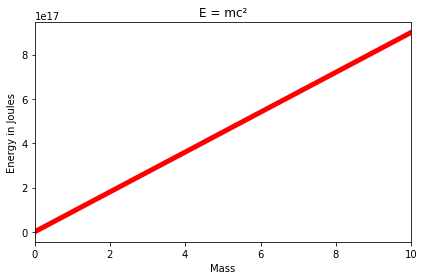

In [51]:
fig = plt.figure()
plt.plot(m, E, color = 'red', lw= '5')

plt.xlabel('Mass')
plt.ylabel('Energy in Joules')
plt.title('E = mc²')

plt.xlim(0, 10)
plt.tight_layout();

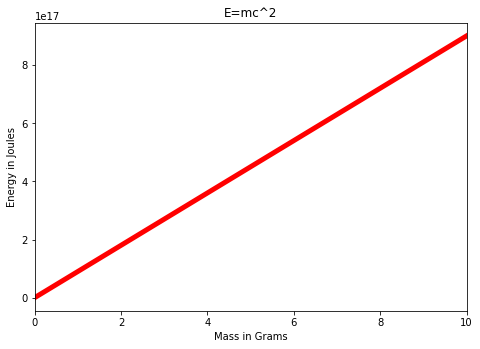

In [46]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

ax1.plot(m, E, color="red", lw=5)
plt.xlabel("Mass in Grams")
plt.ylabel("Energy in Joules")

plt.title("E=mc^2")
plt.xlim(0,10);

C:\Users\ata\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


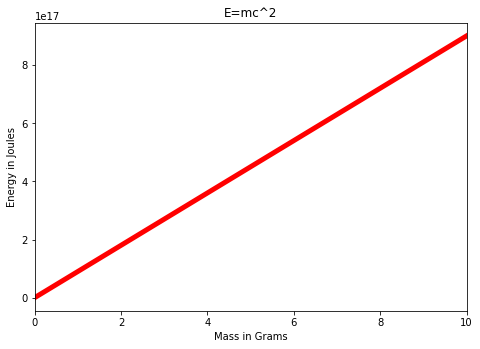

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1,)

ax = fig.add_axes([0, 0, 1, 1])
ax.plot(m, E, color="red", lw=5)
ax.set_xlabel("Mass in Grams")
ax.set_ylabel("Energy in Joules")

ax.set_title("E=mc^2")
plt.xlim(0,10);
plt.tight_layout();

In [23]:
# DON'T RUN THE CELL BELOW< THAT WILL ERASE THE PLOT!

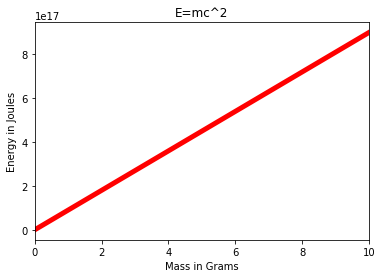

### Part Three (BONUS)

**Can you figure out how to plot this on a logarthimic scale on the y axis? Place a grid along the y axis ticks as well. We didn't show this in the videos, but you should be able to figure this out by referencing Google, StackOverflow, Matplotlib Docs, or even our "Additional Matplotlib Commands" notebook. The plot we show here only required two more lines of code for the changes.**

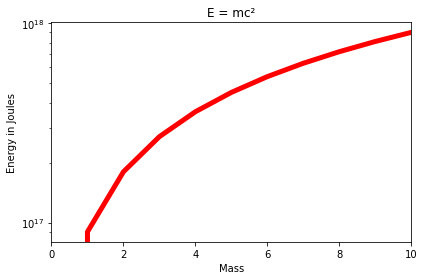

In [52]:
fig = plt.figure()
plt.plot(m, E, color = 'red', lw= '5')

plt.xlabel('Mass')
plt.ylabel('Energy in Joules')
plt.title('E = mc²')
plt.yscale('log')

plt.xlim(0, 10)
plt.tight_layout();

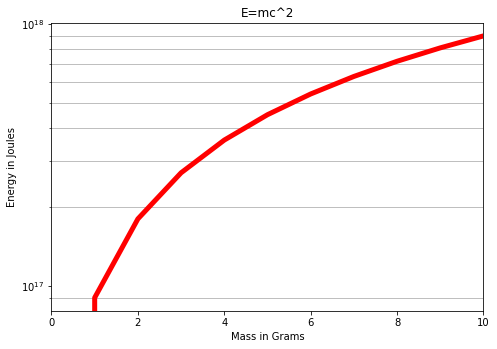

In [86]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])

ax1.plot(m, E, color="red", lw=5)
ax1.set_yscale('log')

plt.xlabel("Mass in Grams")
plt.ylabel("Energy in Joules")

plt.title("E=mc^2")
plt.xlim(0,10)

plt.grid(True, which = 'minor');

In [29]:
# DONT RUN THE CELL BELOW! THAT WILL ERASE THE PLOT!

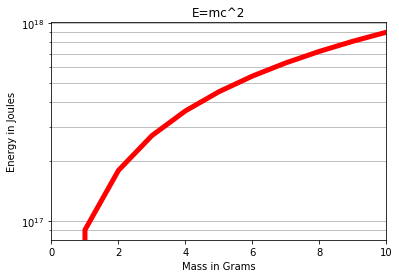

---
---

## Task Two: Creating plots from data points

In finance, the yield curve is a curve showing several yields to maturity or interest rates across different contract lengths (2 month, 2 year, 20 year, etc. ...) for a similar debt contract. The curve shows the relation between the (level of the) interest rate (or cost of borrowing) and the time to maturity, known as the "term", of the debt for a given borrower in a given currency.

The U.S. dollar interest rates paid on U.S. Treasury securities for various maturities are closely watched by many traders, and are commonly plotted on a graph such as the one on the right, which is informally called "the yield curve".

**For this exercise, we will give you the data for the yield curves at two separate points in time. Then we will ask you to create some plots from this data.**

## Part One: Yield Curve Data

**We've obtained some yeild curve data for you from the [US Treasury Dept.](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield). The data shows the interest paid for a US Treasury bond for a certain contract length. The labels list shows the corresponding contract length per index position.**

**TASK: Run the cell below to create the lists for plotting.**

In [87]:
labels = ['1 Mo','3 Mo','6 Mo','1 Yr','2 Yr','3 Yr','5 Yr','7 Yr','10 Yr','20 Yr','30 Yr']

july16_2007 =[4.75,4.98,5.08,5.01,4.89,4.89,4.95,4.99,5.05,5.21,5.14]
july16_2020 = [0.12,0.11,0.13,0.14,0.16,0.17,0.28,0.46,0.62,1.09,1.31]

**TASK: Figure out how to plot both curves on the same Figure. Add a legend to show which curve corresponds to a certain year.**

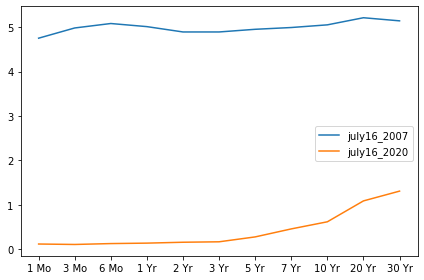

In [151]:
plt.plot(labels, july16_2007, labels, july16_2020)
plt.legend(['july16_2007', 'july16_2020'], loc='best', bbox_to_anchor=( 0.5, 0.34, 0.5, 0.2))
plt.tight_layout();

In [38]:
# DONT RUN THE CELL BELOW! IT WILL ERASE THE PLOT!

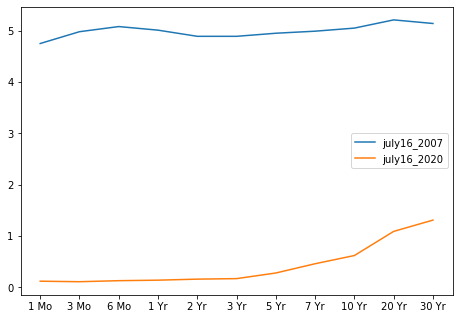

**TASK: The legend in the plot above looks a little strange in the middle of the curves. While it is not blocking anything, it would be nicer if it were *outside* the plot. Figure out how to move the legend outside the main Figure plot.**

C:\Users\ata\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


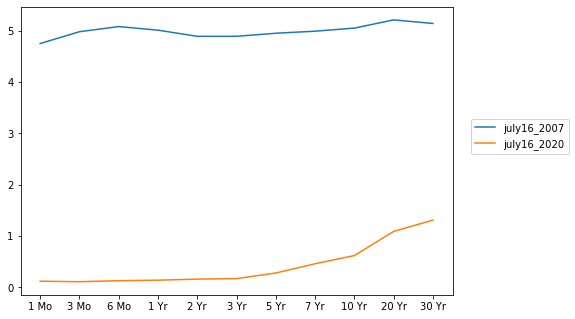

In [201]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
plt.plot(labels, july16_2007, labels, july16_2020)
plt.legend(['july16_2007', 'july16_2020'], loc='right', bbox_to_anchor=(1.78, 0.8, -0.5, -0.5))
plt.tight_layout();

In [45]:
# DONT RUN THE CELL BELOW! IT WILL ERASE THE PLOT!

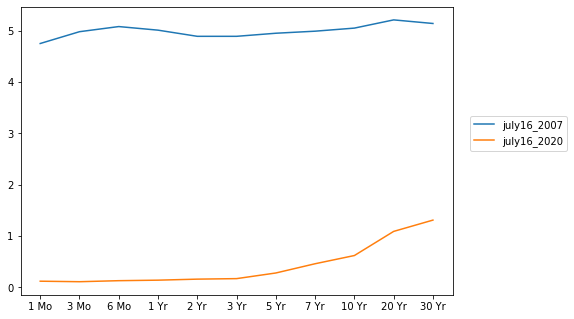

**TASK: While the plot above clearly shows how rates fell from 2007 to 2020, putting these on the same plot makes it difficult to discern the rate differences within the same year. Use .suplots() to create the plot figure below, which shows each year's yield curve.**

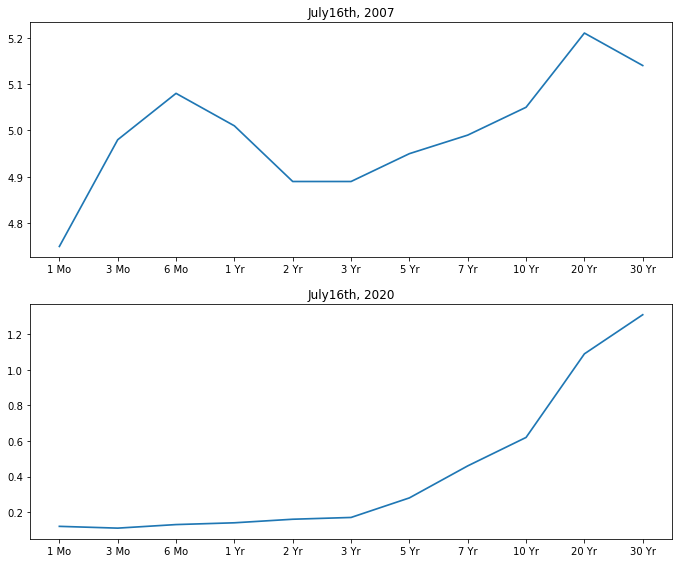

In [153]:
fig, ax = plt.subplots(2, 1, figsize=(11.5,9.5))
ax[0].plot(labels, july16_2007, lw=1.7)
ax[0].set_title("July16th, 2007");


ax[1].plot(labels, july16_2020, lw=1.7)
ax[1].set_title("July16th, 2020");

In [51]:
# DONT RUN THE CELL BELOW! IT WILL ERASE THE PLOT!

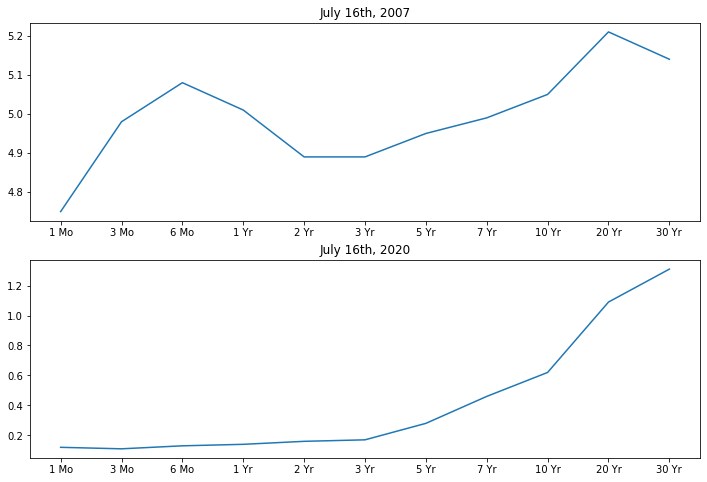

**BONUS CHALLENGE TASK: Try to recreate the plot below that uses twin axes. While this plot may actually be more confusing than helpful, its a good exercise in Matplotlib control.**

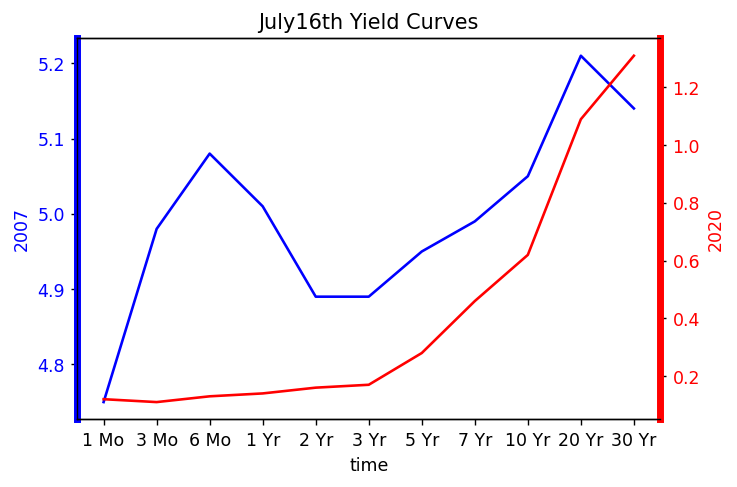

In [182]:
fig, ax1 = plt.subplots(dpi=125)

color = 'blue'
ax1.set_xlabel('time')
ax1.set_ylabel('2007', color=color)
ax1.plot(labels, july16_2007, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.spines['left'].set_color('blue')
ax1.spines['left'].set_linewidth(4)

ax2 = ax1.twinx()  

color = 'red'
ax2.set_ylabel('2020', color=color) 
ax2.plot(labels, july16_2020, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(4)

plt.title('July16th Yield Curves')
plt.tight_layout() 
ax1.axis("tight")
ax2.axis("tight");

In [63]:
# DONT RUN THE CELL BELOW! IT ERASES THE PLOT!

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 8 Text yticklabel objects>)

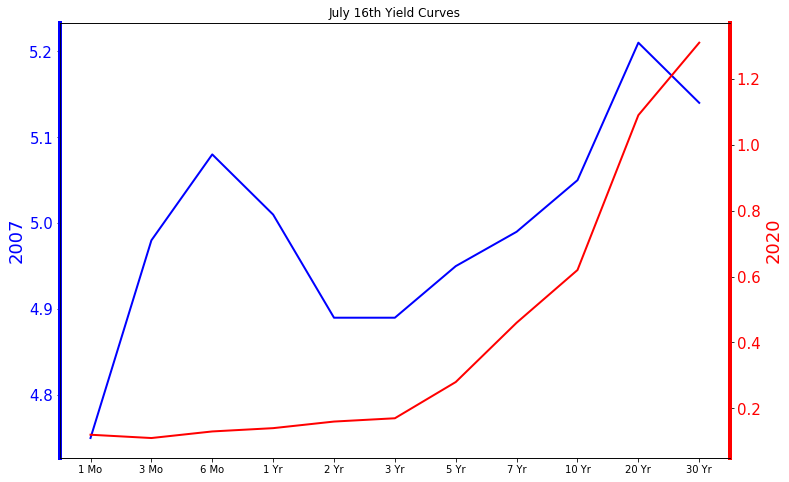

-----